In [1]:
%load_ext lab_black
import dash
import dash_bootstrap_components as dbc
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
import sqlalchemy
import os
from pathlib import Path
from typing import Tuple, Optional

/Users/senosam/opt/anaconda3/lib/python3.7/site-packages/numba/core/errors.py:149: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
# data from
# https://www.basketball-reference.com/leagues/NBA_2019_totals.html#totals
# https://www.basketball-reference.com/wnba/years/2019_totals.html#totals

In [3]:
# Read datasets
wnba_salary = pd.read_csv("data/cleaned_wnba_player_salary_data.csv")
nba_salary = pd.read_csv("data/cleaned_nba_player_salary_data.csv")
wnba_stats = pd.read_csv("data/WNBA_stats_2019.csv")
nba_stats = pd.read_csv("data/NBA_stats_2019.csv")

# Clean Player names in wnba_stats
wnba_stats["Player"] = wnba_stats["Player"].str.replace("</strong", "")

# Clean player names in salary dfs
nba_salary["Player"] = nba_salary["first_name"] + " " + nba_salary["last_name"]
wnba_salary["Player"] = wnba_salary["first_name"] + " " + wnba_salary["last_name"]

# Join datasets
nba_complete = (
    nba_salary.set_index("Player")
    .join(nba_stats.set_index("Player"), how="inner")
    .reset_index()
)
wnba_complete = (
    wnba_salary.set_index("Player")
    .join(wnba_stats.set_index("Player"), how="inner")
    .reset_index()
)

# rename teams column in nba df
nba_complete.rename(columns={"Tm": "Team"}, inplace=True)

# Add league information
nba_complete["League"] = "NBA"
wnba_complete["League"] = "WNBA"

# homogenize columns
column_names = [
    "Player",
    "League",
    "Team",
    "Pos",
    "salary",
    "G",
    "GS",
    "MP",
    "FG",
    "FGA",
    "FG%",
    "3P",
    "3PA",
    "3P%",
    "2P",
    "2PA",
    "2P%",
    "FT",
    "FTA",
    "FT%",
    "ORB",
    "TRB",
    "AST",
    "STL",
    "BLK",
    "TOV",
    "PF",
    "PTS",
]
nba_complete = nba_complete[column_names]
wnba_complete = wnba_complete[column_names]

nba_wnba = pd.concat([nba_complete, wnba_complete])

nba_wnba.to_csv("data/cleaned_data_wnba_nba_2019.csv", index=False)

In [67]:
_dict = {
    "Player": "Player",
    "League": "League",
    "Team": "Team",
    "Pos": "Position",
    "salary": "Salary",
    "G": "Games",
    "GS": "Games Started",
    "MP": "Minutes Played",
    "FG": "Field Goals",
    "FGA": "Field Goals Attempts",
    "FG%": "Field Goal Percentage",
    "3P": "3-Point Field Goals",
    "3PA": "3-Point Field Goal Attempts",
    "3P%": "3-Point Field Goal Percentage",
    "2P": "2-Point Field Goals",
    "2PA": "2-Point Field Goal Attempts",
    "2P%": "2-Point Field Goal Percentage",
    "FT": "Free Throws",
    "FTA": "Free Throw Attempt",
    "FT%": "Free Throw Percentage",
    "ORB": "Offensive Rebounds",
    "TRB": "Total Rebounds",
    "AST": "Assits",
    "STL": "Steals",
    "BLK": "Blocks",
    "TOV": "Turnovers",
    "PF": "Personal Fouls",
    "PTS": "Points",
}

In [4]:
nba_complete

,Player,League,Team,Pos,salary,G,GS,MP,FG,FGA,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,NBA,ORL,PF,19863636,78,78,2633,470,1046,...,253,0.731,129,574,289,57,56,162,172,1246
1,Aaron Holiday,NBA,IND,PG,2329200,50,0,646,105,262,...,50,0.820,5,67,87,21,13,40,71,294
2,Abdel Nader,NBA,OKC,SF,1618520,61,1,694,91,215,...,36,0.750,14,116,20,20,12,26,68,241
3,Al Horford,NBA,BOS,C,28000000,68,68,1973,387,723,...,95,0.821,120,458,283,59,86,102,126,925
4,Al-Farouq Aminu,NBA,POR,PF,9258000,81,81,2292,257,593,...,173,0.867,112,610,104,68,33,72,143,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Yogi Ferrell,NBA,SAC,PG,3150000,71,3,1067,153,352,...,67,0.896,13,109,137,36,4,40,64,420
482,Zach Collins,NBA,POR,C,4240200,77,0,1356,189,400,...,126,0.746,109,324,71,25,66,77,174,512
483,Zach LaVine,NBA,CHI,SG,19500000,63,62,2171,530,1135,...,375,0.832,40,294,283,60,26,215,140,1492
484,Zhaire Smith,NBA,PHI,SG,3058800,6,2,111,14,34,...,8,0.750,3,13,10,2,2,6,8,40


In [ ]:
stats_dict = {
    "G": "Games",
    "GS": "Games Started",
    "MP": "Minutes Played",
    "FG": "Field Goals",
    "FGA": "Field Goals Attempts",
    "FG%": "Field Goal Percentage",
    "3P": "3-Point Field Goals",
    "3PA": "3-Point Field Goal Attempts",
    "3P%": "3-Point Field Goal Percentage",
    "2P": "2-Point Field Goals",
    "2PA": "2-Point Field Goal Attempts",
    "2P%": "2-Point Field Goal Percentage",
    "FT": "Free Throws",
    "FTA": "Free Throw Attempt",
    "FT%": "Free Throw Percentage",
    "ORB": "Offensive Rebounds",
    "TRB": "Total Rebounds",
    "AST": "Assits",
    "STL": "Steals",
    "BLK": "Blocks",
    "TOV": "Turnovers",
    "PF": "Personal Fouls",
    "PTS": "Points",
}

In [123]:
def filter_data(nba_wnba, league_val, stat):
    # Filter by League
    if league_val == 0:
        df = nba_wnba[nba_wnba["League"] == "WNBA"]
    if league_val == 1:
        df = nba_wnba[nba_wnba["League"] == "NBA"]
    if league_val == 2:
        df = nba_wnba

    # Filter and sort by stat
    df = (
        df[["Player", "League", "Team", "Pos", "salary", stat]]
        .sort_values(stat, axis=0, ascending=False)
        .head(10)
    )

    return df


def top10players_bystat(df, league_val, stat):
    # Filter data
    df = filter_data(df, league_val=league_val, stat=stat)
    # Plot by stat
    fig_stat = px.bar(
        df.sort_values(stat),
        y="Player",
        x=stat,
        color="League",
        hover_data=["League", "Team", "Pos"],
        color_discrete_map={"WNBA": "#F57B20", "NBA": "#17408B"},
    )
    fig_stat.update_layout(
        title_text="Top 10 players by chosen stat",
        showlegend=False,
        title_font_size=22,
        title_x=0.5,
        title_y=0.92,
        yaxis=dict(
            title=None,
            titlefont_size=16,
            tickfont_size=11,
        ),
        xaxis=dict(
            title=stat,
            titlefont_size=16,
            tickfont_size=11,
        ),
    )
    # Plot by salary
    fig_salary = px.bar(
        df.sort_values(stat),
        y="Player",
        x="salary",
        color="League",
        hover_data=["League", "Team", "Pos"],
        color_discrete_map={"WNBA": "#F57B20", "NBA": "#17408B"},
    )
    fig_salary.update_layout(
        title_text="Salary of top 10 players by chosen stat",
        showlegend=False,
        title_font_size=22,
        title_x=0.5,
        title_y=0.92,
        yaxis=dict(
            title=None,
            titlefont_size=16,
            tickfont_size=11,
        ),
        xaxis=dict(
            title=stat,
            titlefont_size=16,
            tickfont_size=11,
        ),
    )

    return fig_stat, fig_salary

In [124]:
fig_stat, fig_salary = top10players_bystat(nba_wnba, league_val=1, stat="PTS")

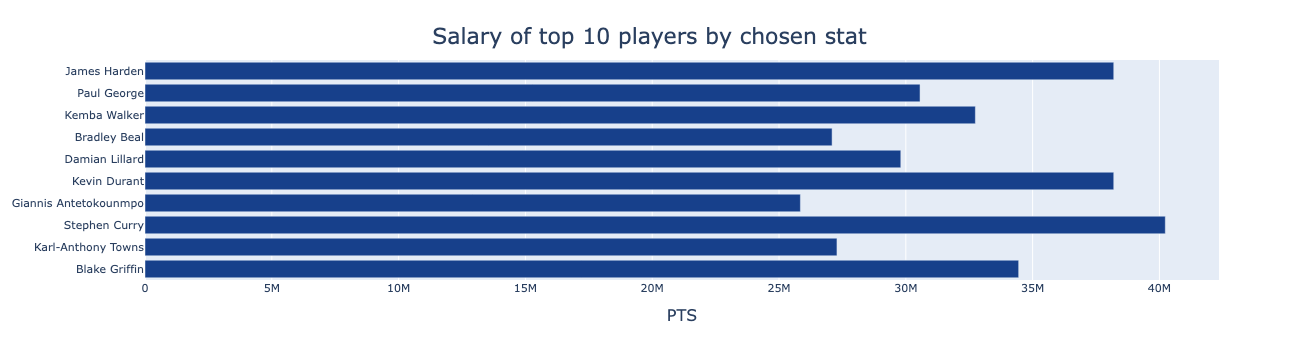

In [126]:
fig_salary.show()

In [10]:
df = filter_data(nba_wnba, league_val=0, stat="PTS")

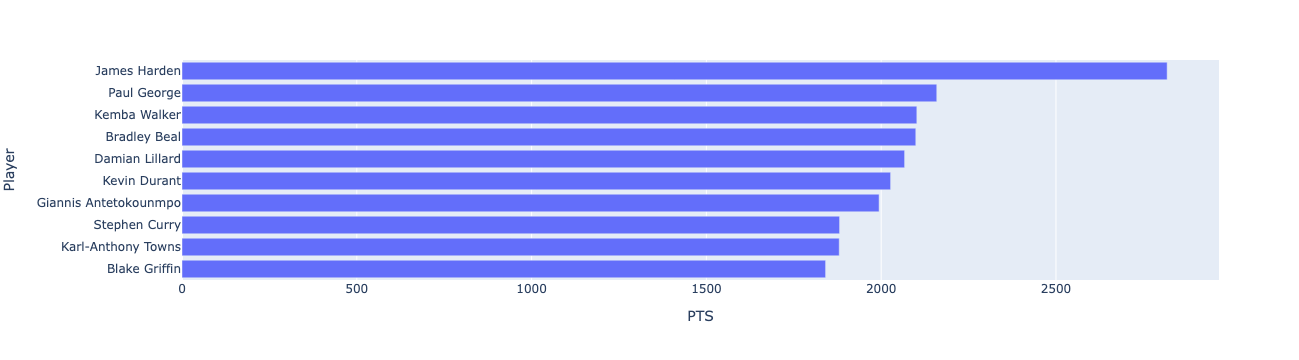

In [12]:
fig = px.bar(df.sort_values("PTS"), y="Player", x="PTS")
fig.show()